## 1. Importación de librerías

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("../../datos/online_shoppers_intention.csv")

In [8]:
len(df.columns)

18

In [9]:
df.dtypes.value_counts()

int64      7
float64    7
object     2
bool       2
Name: count, dtype: int64

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [13]:
numerics = df[df.columns[:10]].columns.to_list()
categoricals = df[df.columns[10:]].columns.to_list()

print("Variables numéricas: ",numerics)
print("Variables categóricas: ",categoricals)

Variables numéricas:  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
Variables categóricas:  ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


## 2. Descripción de la base de datos

**Número de registros:** 12.330

**Columnas:** 17 columnas características de métricas y 1 columna (Revenue) que indica si la sesión finalizó o no en una compra.

**Tipo de datos:** El conjunto de datos consta de 10 atributos numéricos y 8 categóricos, teniendo en cuenta que algunas variables categóricas tienen asignado un valor numérico relacionado con su categoría.
<br><br>
**Descripción de variables:**

"Administrive", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated" y "ProductRelated_Duration" representan el número de tipos de páginas visitadas por el visitante en esa sesión y el tiempo total dedicado a cada una de estas categorías.

Las características "BounceRates", "ExitRates" y "PageValues" representan las métricas medidas por Google Analytics para cada página del sitio web de comercio electrónico.

- El valor de la característica "BounceRates" para una página web se refiere al porcentaje de visitantes que entran al sitio desde esa página y luego rebotan sin generar ninguna otra solicitud al servidor de análisis durante esa sesión.

- El valor de la métrica "ExitRates" para una página web específica se calcula como el porcentaje de todas las visitas a esa página que terminaron siendo la última página vista en la sesión.

- La métrica “PageValues” representa el valor promedio (en moneda) que se le asigna a una página web cuando un usuario la visitó antes de completar una transacción de comercio electrónico. Se calcula como el valor total de las transacciones completadas en las que el usuario navegó por esa página divido la cantidad total de sesiones que pasando por esa página terminaron con una transacción.

La característica "SpecialDay" indica la proximidad de la visita al sitio web a un día especial (por ejemplo, el Día de la Madre o San Valentín) en el que es más probable que las sesiones finalicen con una transacción. El valor de este atributo se determina considerando la dinámica del comercio electrónico, como el tiempo transcurrido entre la fecha del pedido y la fecha de entrega. Por ejemplo, para el Día de San Valentín, este valor toma un valor distinto de cero entre el 2 y el 12 de febrero, cero antes y después de esta fecha, a menos que esté cerca de otro día especial, y su valor máximo es 1 el 8 de febrero.

El conjunto de datos también incluye el sistema operativo, el navegador, la región, el tipo de tráfico, si el visitante es recurrente o nuevo, un valor booleano que indica si la fecha de la visita es fin de semana y el mes del año.




## 3. Análisis inicial de las variables

In [14]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [15]:
variables_clave = ['ProductRelated', 'ProductRelated_Duration', 'SpecialDay', "Month", "VisitorType","Weekend"]
print("\nVista rápida de variables clave:")
print(df[variables_clave].head())
print("\nEstadísticas descriptivas de variables clave:")
print(df[variables_clave].drop("SpecialDay",axis=1).describe())


Vista rápida de variables clave:
   ProductRelated  ProductRelated_Duration  SpecialDay Month  \
0               1                 0.000000         0.0   Feb   
1               2                64.000000         0.0   Feb   
2               1                 0.000000         0.0   Feb   
3               2                 2.666667         0.0   Feb   
4              10               627.500000         0.0   Feb   

         VisitorType  Weekend  
0  Returning_Visitor    False  
1  Returning_Visitor    False  
2  Returning_Visitor    False  
3  Returning_Visitor    False  
4  Returning_Visitor     True  

Estadísticas descriptivas de variables clave:
       ProductRelated  ProductRelated_Duration
count    12330.000000             12330.000000
mean        31.731468              1194.746220
std         44.475503              1913.669288
min          0.000000                 0.000000
25%          7.000000               184.137500
50%         18.000000               598.936905
75%         3

# 4. Visualizaciones exploratorias básicas

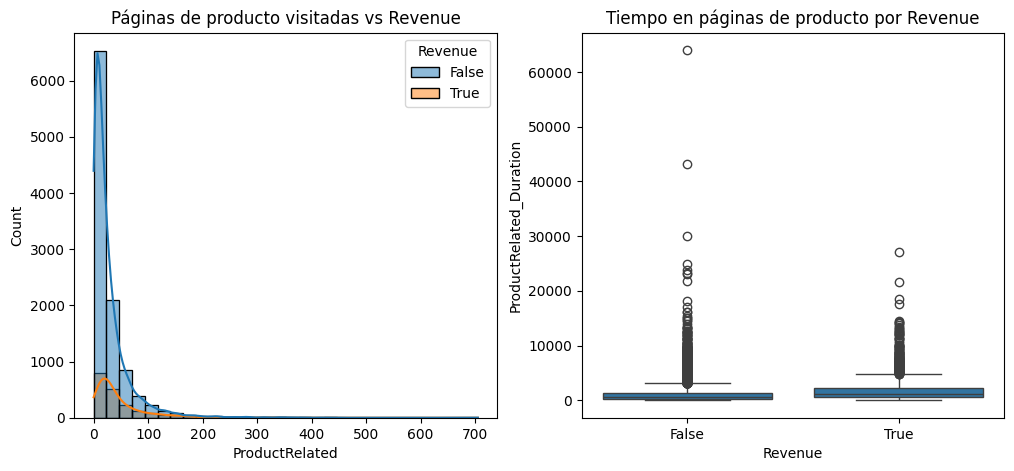

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(data=df, x="ProductRelated", hue="Revenue", kde=True, bins=30, ax=ax[0])
sns.boxplot(x="Revenue", y="ProductRelated_Duration", data=df, ax=ax[1])
ax[0].set_title("Páginas de producto visitadas vs Revenue")
ax[1].set_title("Tiempo en páginas de producto por Revenue")
plt.show()

Existe una proporción similar de visitas a páginas relacionadas a productos entre quienes realizan o no una compra durante la sesión, esto indica baja relación entre la cantidad de visitas a páginas relacionadas a productos con la compra. Sin embargo, se puede ver que el tiempo que se pasa en estas páginas es mayor en aquellas sesiones que terminan en compra.

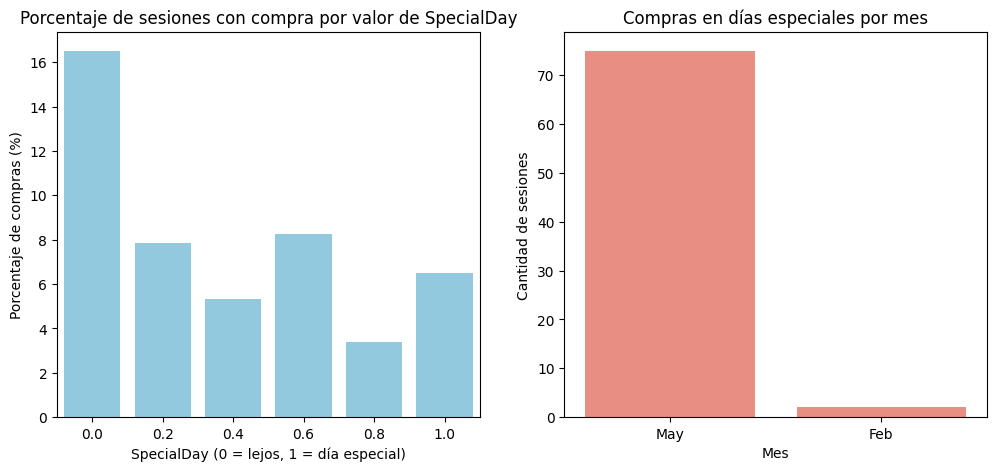

In [17]:
specialday_revenue = df.groupby("SpecialDay")["Revenue"].mean().reset_index()
specialday_revenue["Revenue"] = specialday_revenue["Revenue"] * 100

df_specialday_month_revenue = df.loc[(df["SpecialDay"] > 0) & (df["Revenue"] == 1)]["Month"].value_counts().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.barplot(x="SpecialDay", y="Revenue", data=specialday_revenue, color="skyblue", ax=ax[0])
ax[0].set_title("Porcentaje de sesiones con compra por valor de SpecialDay")
ax[0].set_xlabel("SpecialDay (0 = lejos, 1 = día especial)")
ax[0].set_ylabel("Porcentaje de compras (%)")

sns.barplot(x="Month", y="count", data=df_specialday_month_revenue, color="salmon", ax=ax[1])
ax[1].set_title("Compras en días especiales por mes")
ax[1].set_xlabel("Mes")
ax[1].set_ylabel("Cantidad de sesiones")

plt.show()

En las gráficas anteriores se puede observar que:
- No hay una tendencia mayor a que una sesión cercana a un día especial termine en compra frente a una sesión fuera del rango de día especial.
- Solamente se hicieron compras en los rangos de día especial en los meses de mayo y febrero.

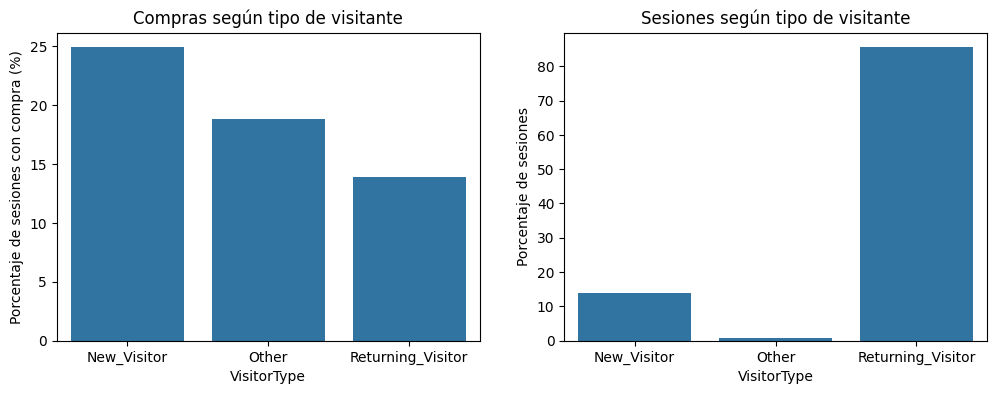

In [18]:
porcentajes_venta = df.groupby("VisitorType")["Revenue"].mean().reset_index()
porcentajes_venta["Revenue"] = porcentajes_venta["Revenue"] * 100

porcentajes_sesion_visitortype = df.groupby("VisitorType")["Revenue"].count().reset_index()
porcentajes_sesion_visitortype["Revenue"] = porcentajes_sesion_visitortype["Revenue"]/len(df) * 100

fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.barplot(data=porcentajes_venta, x="VisitorType", y="Revenue", ax=ax[0])
ax[0].set_ylabel("Porcentaje de sesiones con compra (%)")
ax[0].set_title("Compras según tipo de visitante")

sns.barplot(data=porcentajes_sesion_visitortype, x="VisitorType", y="Revenue", ax=ax[1])
ax[1].set_title("Sesiones según tipo de visitante")
ax[1].set_ylabel("Porcentaje de sesiones")
plt.show()



Aunque la base de datos no especifica que significa "Other VisitorType", se puede observar que un mayor porcentaje de visitas de un usuario nuevo terminaron en compra frente a las visitas de un usuario recurrente a pesar de que las sesiones de un usuario recurrente representan un porcentaje mucho mayor en el total de sesiones del dataset.

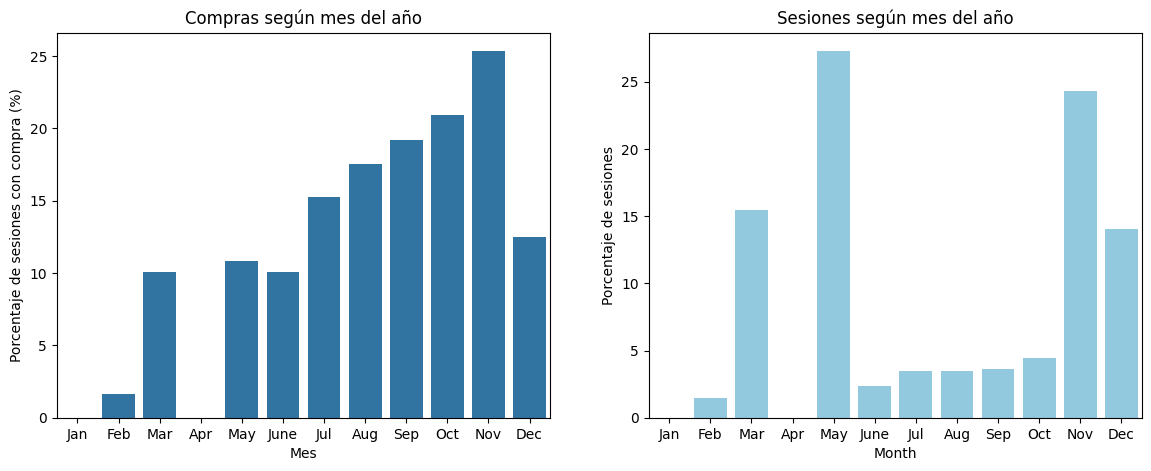

In [19]:
porcentajes_compra_mes = df.groupby("Month")["Revenue"].mean().reset_index()
porcentajes_compra_mes["Revenue"] *= 100

porcentajes_sesion_mes = df.groupby("Month")["Revenue"].count().reset_index()
porcentajes_sesion_mes["Revenue"] = porcentajes_sesion_mes["Revenue"]/len(df) * 100

fig, ax = plt.subplots(1,2,figsize=(14,5))

sns.barplot(data=porcentajes_compra_mes, x="Month", y="Revenue", order=["Jan","Feb","Mar","Apr","May","June","Jul","Aug","Sep","Oct","Nov","Dec"], ax=ax[0])
ax[0].set_ylabel("Porcentaje de sesiones con compra (%)")
ax[0].set_xlabel("Mes")
ax[0].set_title("Compras según mes del año")

sns.barplot(color="skyblue",data=porcentajes_sesion_mes, x="Month", y="Revenue", order=["Jan","Feb","Mar","Apr","May","June","Jul","Aug","Sep","Oct","Nov","Dec"], ax=ax[1])
ax[1].set_title("Sesiones según mes del año")
ax[1].set_ylabel("Porcentaje de sesiones")

plt.show()


Analizando el porcentaje de sesiones con compra por cada mes, se puede observar que, exceptuando diciembre, hay una tendencia incremental en el segundo semestre del año.

Adicional, podemos ver que hay un mayor flujo de usuarios en los meses de mayo y noviembre.

Finalmente se observa que el dataset no contiene datos para los meses de enero y abril.